<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 2</b><br><br>

  Hi Braden, I’m <b>Victor Camargo</b>. Thanks for updating your project!

  You’ve addressed most of my comments thoughtfully, especially around data preparation, visual clarity, and hypothesis testing. The project is now well-structured, your justifications are stronger, and the insights are clearer and more aligned with the business goal.

  <b>Project approved 🎉</b><br>
</div>


# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
games.info()
print(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08  

In [4]:
# Check for duplicate entries
duplicates = games.duplicated()

print("There are", duplicates.sum(), "duplicated rows.")

# print(games[games['name'].isna()])

There are 0 duplicated rows.


### Key Questions to Answer:

What's the total number of records in our dataset?
There are a total of 16715 records for each column.
What data types are present in each column?
Object and floats.
Are there any obvious issues with the data?
User score and rating being objects instead of floats. There are lots of missing data. The critic score, user score and rating specifically are missing thousands of data points.
Do we see any immediate patterns or anomalies?
The thousands of missing data points could just be indicating games that either never received a rating, weren't reviewed or weren't launched yet.

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()

In [6]:
# Verify the changes
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2 Data Type Conversion

In [7]:
# Check current data types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Make changes to data types if necessary
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float')
games['rating'] = games['rating'].astype('category')
# Describe the columns where the data types have been changed and why.
# Changed the Year of Release to int since unless we are doing a full day-month-year of release we only need a full number for the year of release.
# For user score was going to turn it into a float since those scores are from 1-10.
# The issue there was User Score has some objects of 'TBD'.
# To solve that, I will turn the tbd to NaN so we can do numeric calculations without errors.
# I did decide to turn the rating into a category type as it is a qualitative type of rating and if I needed I could even sort the list by the
# Ratings column.

In [9]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
# See above to see how I handled those cases
games.info()
print((games['year_of_release'] == 0).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16446 non-null  object  
 2   year_of_release  16446 non-null  int64   
 3   genre            16444 non-null  object  
 4   na_sales         16446 non-null  float64 
 5   eu_sales         16446 non-null  float64 
 6   jp_sales         16446 non-null  float64 
 7   other_sales      16446 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           9768 non-null   category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 1.4+ MB
0


### 2.3 Handling Missing Values

In [10]:
# Examine missing values
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [11]:
# Calculate percentage of missing values
(games.isna().mean() * 100).round(2)

name                0.01
platform            0.00
year_of_release     0.00
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.46
user_score         54.62
rating             40.61
dtype: float64

In [12]:
# Analyze patterns in missing values
# From what we see here the  columns with the most missing values are User Score, Critic Score and Rating in that order.
# That would be due to not all games getting reviewed by citics and not all users submitting a score for the game.
# For the missing ratings, that could be due to the games only being released in Japan or the Asian region or the data got lost.
# for the name and genre missing, it could be a corrupted data point or improperly loaded. May need to drop them.
# def fill_year_from_similar_rows(row):
#    if row['year_of_release'] != 0:
#        return row['year_of_release']

#    matches = games[
#        (games['name'] == row['name']) &
#        (games['genre'] == row['genre']) &
#        (games['year_of_release'] != 0)
#    ]

#    if not matches.empty:
#        return int(matches['year_of_release'].mode().iloc[0])
#    return 0
# To deal with all of the year_of_release that were NaN and changed to 0 we are going to compare the name and genre of every other row to see if they match a row with a 0 in year_of_release
# Then we will fill in the year_of_release from the other game that matches which should lessen the total missing year_of_release's

In [13]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
games['rating'] = games['rating'].cat.add_categories('unknown')
games['rating'] = games['rating'].fillna('unknown')
games = games.dropna(subset=['name', 'genre'])
# games['year_of_release'] = games.apply(fill_year_from_similar_rows, axis=1)
# games = games[games['year_of_release'] != 0].reset_index(drop=True)
# Since critic score and user score aren't essential for sales analysis I've chosen to leave the NaN values.
# I've decided that its probably best to drop the rows with the name and genre missing. This is because it would be meaningless to analyze the data from those games since we dont know the name or genre.

In [14]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.
# year_of_release will likely be due to inconsistent data entry or the records not being updated. They could also be upcoming or canceled games.
# user_score and critic_score are commonly missing for newer or less popular games.
# rating would be missing if games were released in markets that dont use ESRB or they weren't finalized.
# games.info()
# print((games['year_of_release'] == 0).sum())

### 2.4 Calculate Total Sales

In [15]:
# Calculate total sales across all regions and put them in a different column
games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [16]:
# Create a DataFrame with game releases by year
games_per_year = games.groupby('year_of_release')['name'].count().reset_index()

games_per_year.columns = ['year_of_release', 'game_count']

games_per_year = games_per_year.sort_values(by='year_of_release')

print(games_per_year.head())

   year_of_release  game_count
0             1980           9
1             1981          46
2             1982          36
3             1983          17
4             1984          14


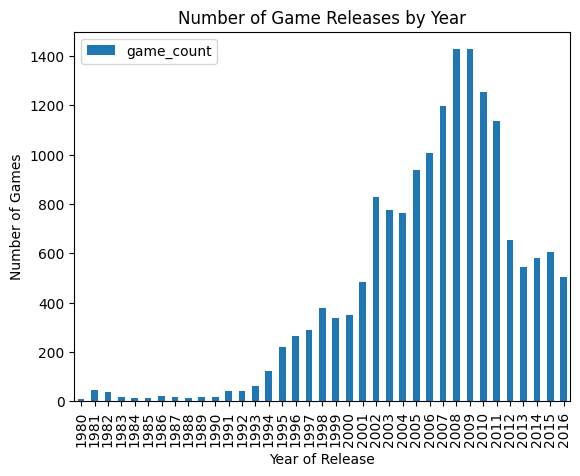

In [17]:
# Visualize the distribution of games across years
games_per_year.plot(kind = 'bar', title = 'Number of Game Releases by Year', xlabel = 'Year of Release', ylabel = 'Number of Games', x = 'year_of_release', y = 'game_count')
plt.show()

In [18]:
# Display summary statistics for each year
games.groupby('year_of_release')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
year_of_release,,,,,,,,
1980,9.0,1.264444,1.383547,0.23,0.3400,0.770,1.1500,4.31
1981,46.0,0.775652,0.783019,0.13,0.3125,0.465,0.9525,4.50
1982,36.0,0.802222,1.257910,0.14,0.3350,0.540,0.7800,7.81
1983,17.0,0.988235,0.838825,0.16,0.4000,0.770,1.1300,3.20
1984,14.0,3.596429,7.200795,0.27,1.1300,1.485,2.0900,28.31
1985,14.0,3.853571,10.510376,0.02,0.4650,1.015,1.4550,40.24
1986,21.0,1.765714,1.328001,0.30,1.1500,1.360,2.2000,6.50
1987,16.0,1.356250,1.225174,0.07,0.4550,0.885,2.2125,4.38
1988,15.0,3.147333,4.414414,0.03,0.9700,1.510,3.1450,17.28


### Questions to Consider:

- Which years show significant numbers of game releases? 2007, 2008, 2009, 2010
- Are there any notable trends or patterns in the number of releases? There is a steady growth in games per year from the early 1980 and 1990s into a massive growth in the 2000s.
- Is there enough recent data to make predictions for 2017? Yes there would be a chance we could attempt to predict 2017 but there is a chance that 2016 is incomplete or just a partial year.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [19]:
# Calculate total sales by platform and year
platform_year_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
print(platform_year_sales.sample(10))

    platform  year_of_release  total_sales
108       PC             2006         2.85
79       NES             1985        53.44
117       PC             2015         8.52
31        DS             2009       119.54
155      PS4             2015       118.90
157      PSP             2004         7.06
197      Wii             2006       137.15
52       GBA             2003        56.67
6       2600             1986         0.67
37        GB             1989        64.97


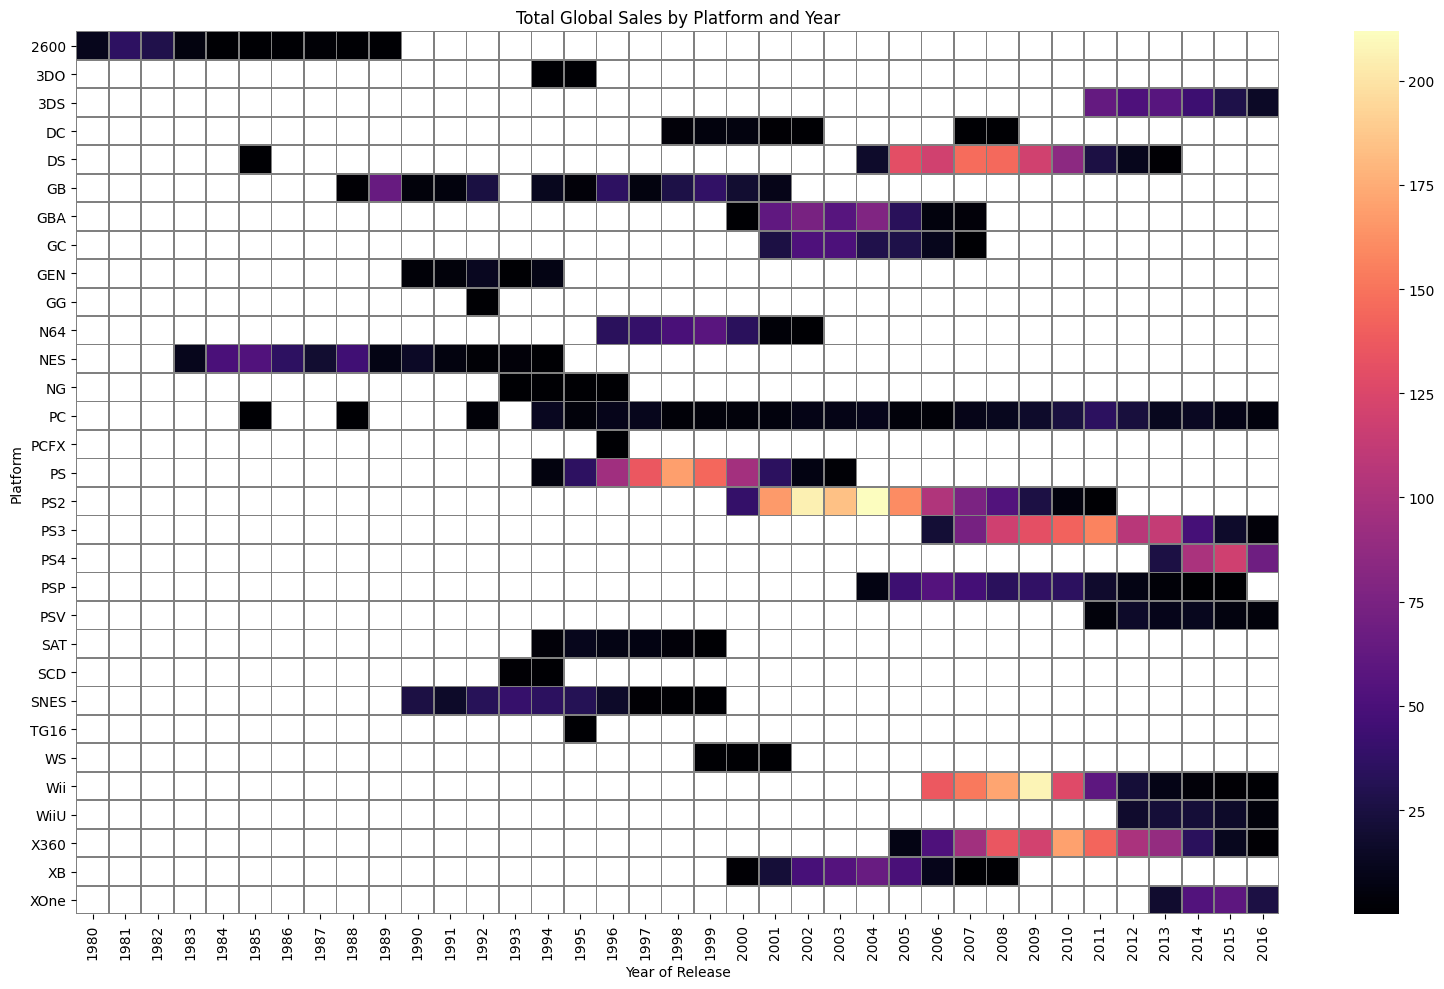

In [20]:
# Create a heatmap of platform sales over time
sales_pivot = platform_year_sales.pivot(index='platform', columns = 'year_of_release', values = 'total_sales')
# print(sales_pivot)
plt.figure(figsize=(16,10))
sns.heatmap(sales_pivot, cmap = 'magma', linewidths=0.5, linecolor = 'gray')
plt.title('Total Global Sales by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

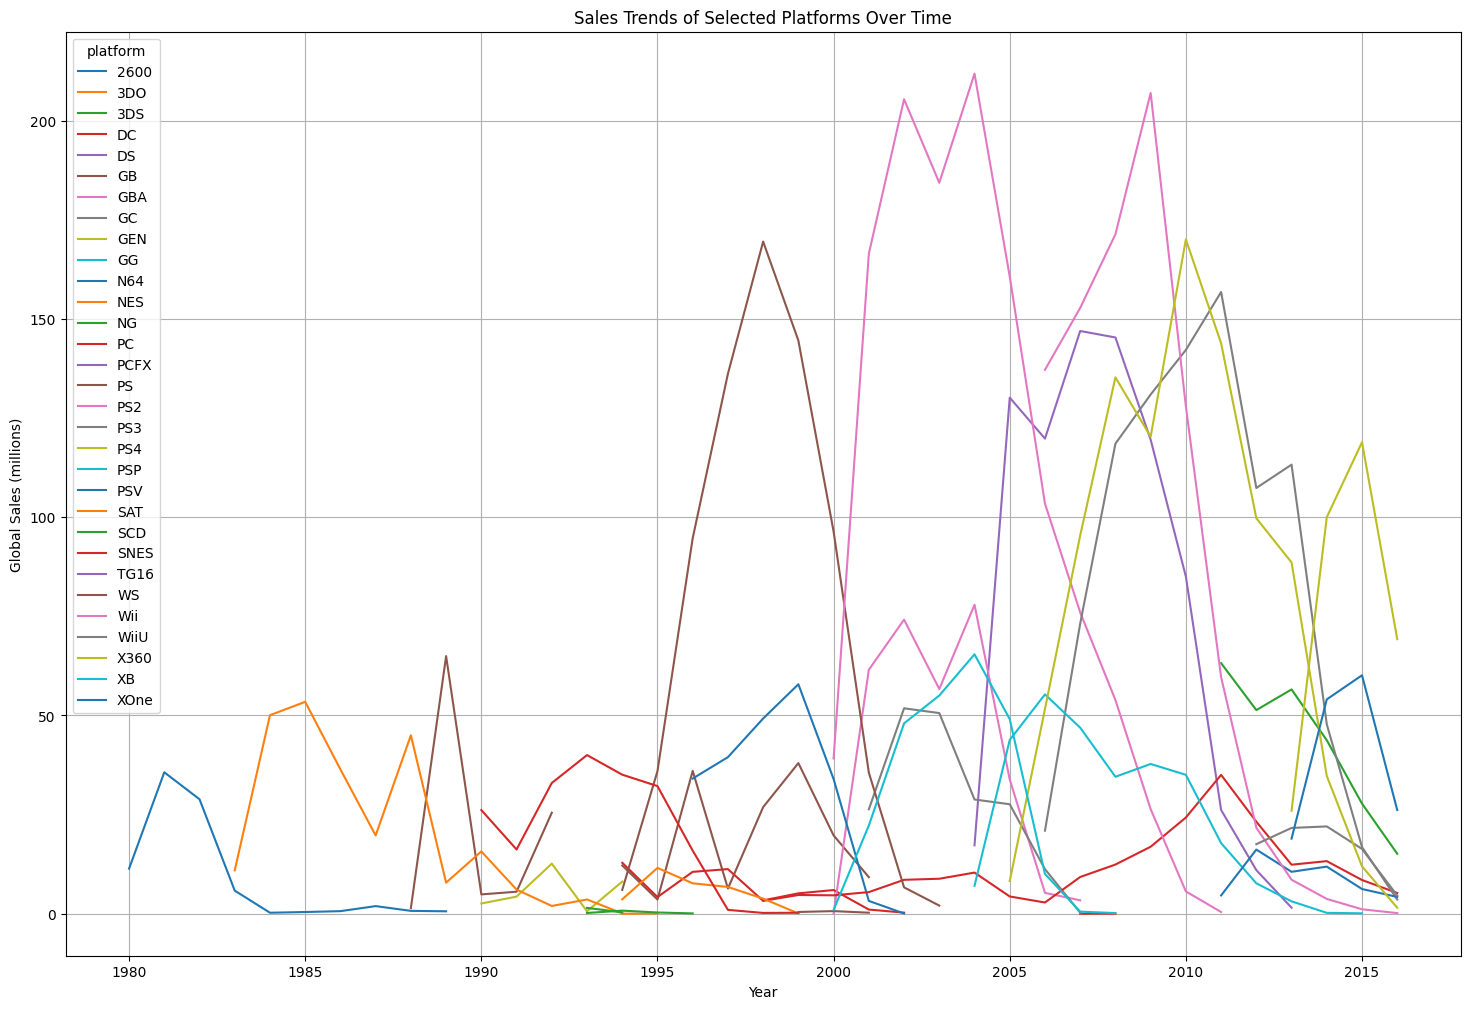

In [21]:
# Identify platforms with declining sales
sales_trend = sales_pivot.T

sales_trend.plot(title = 'Sales Trends of Selected Platforms Over Time', xlabel = 'Year', ylabel = 'Global Sales (millions)', grid = True, figsize = (18, 12))
plt.show()

### Questions to Consider:
- Which platforms show consistent sales over time? PS2 shows strong sales over the time period of 2000-2010. DS is consistent over 2005-2013. PS3 and Xbox 360 had strong consistent sales. PS4 as of 2016 it is still climbing in popularity even with the drop from the incomplete year of 2016 we could predict more consistent sales.
- Can you identify platforms that have disappeared from the market? Yes there are many platforms that disapper from the market. 2600, 3do, dc, ds, gb, gba, gc, gen, gg, nes, ng, pcfx, ps, ps2, psp, sat, scd, snes, tg16, ws, xb
- What's the typical lifecycle of a gaming platform? Launch year has modest to great sales, for the next year or two there is a continued increase in sales, and then if its a well received platform there are several years of peak popularity before it declines where a new platform gets released to replace the old platform until its discontinued.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [22]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]
relevant_years = [2013, 2014, 2015, 2016]
games_relevant_years = games[games['year_of_release'].isin(relevant_years)]

# Justify your choice with data
# The years I chose where the latest full years of data. I didn't include 2016 because from previous analysis I dont believe it is a full year of data as all sales drop including the ones that are up and coming.

### Document Your Decision:
- What years did you select and why? 2013, 2014, 2015, 2016 because this excludes some of the consoles on the way out and includes the consoles that have upward trends for the future. I didn't include 2016 cause it appears to be a partial year sample.
- How does this period reflect current market conditions? The next generation of consoles are on upward sales trends. and the previous ones are filtering out of the market.
- What factors influenced your decision? Sales volumes, genre trends, and regional preferences from these years are most likely to carry forward into 2017.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [23]:
# Analyze platform sales trends
platform_sales = games_relevant_years.groupby('platform')['total_sales'].sum().sort_values(ascending=True)
print(platform_sales)

platform
DS        1.54
PSP       3.50
Wii      13.66
PSV      32.99
PC       39.43
WiiU     64.63
X360    136.80
3DS     143.25
XOne    159.32
PS3     181.43
PS4     314.14
Name: total_sales, dtype: float64


In [24]:
# Sort platforms by total sales
# Sorted in previous cell

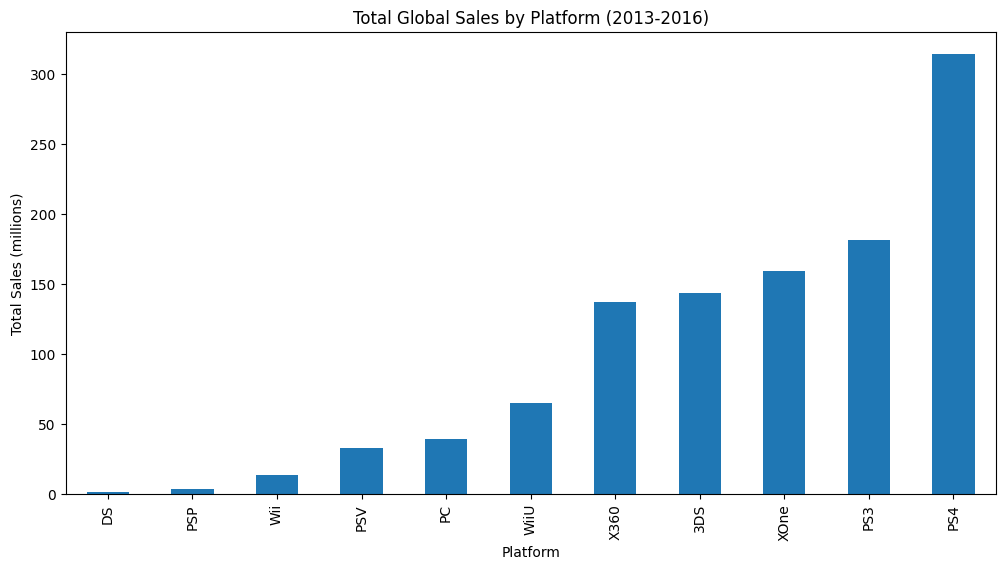

platform           3DS     DS     PC    PS3     PS4     PSP    PSV    Wii  \
year_of_release                                                             
2013              0.00    0.0   0.00   0.00    0.00    0.00   0.00   0.00   
2014            -22.64 -100.0   7.27 -57.83  284.76  -92.36  12.37 -56.34   
2015            -36.52    0.0 -35.84 -64.78   18.90  -50.00 -47.48 -69.60   
2016            -45.50    0.0 -38.38 -78.60  -41.76 -100.00 -32.00 -84.21   

platform          WiiU   X360    XOne  
year_of_release                        
2013              0.00   0.00    0.00  
2014              1.76 -60.78  185.18  
2015            -25.78 -65.57   11.23  
2016            -71.87 -87.29  -56.52  


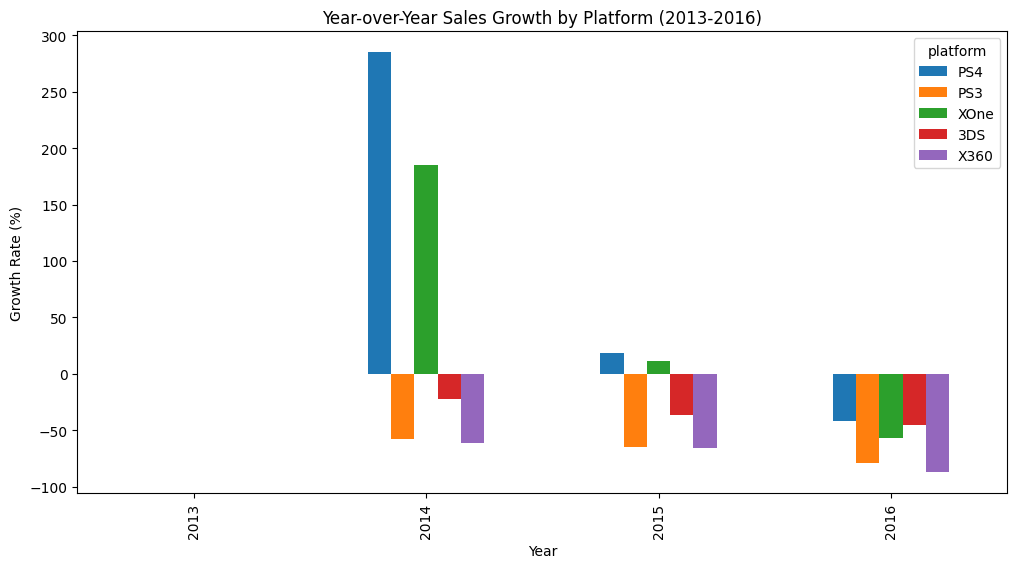

In [25]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
platform_sales.plot(figsize=(12,6), kind = 'bar', title = 'Total Global Sales by Platform (2013-2016)', xlabel = 'Platform', ylabel = 'Total Sales (millions)')
plt.show()

# growth year over year
platform_yearly_sales = games_relevant_years.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)
platform_yearly_growth = platform_yearly_sales.pct_change().fillna(0)*100
print(platform_yearly_growth.round(2))

top_platforms = platform_yearly_sales.sum().sort_values(ascending=False).head(5).index
platform_yearly_growth[top_platforms].plot(kind='bar', figsize=(12,6), title='Year-over-Year Sales Growth by Platform (2013-2016)', xlabel='Year', ylabel='Growth Rate (%)')
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

<Figure size 1400x600 with 0 Axes>

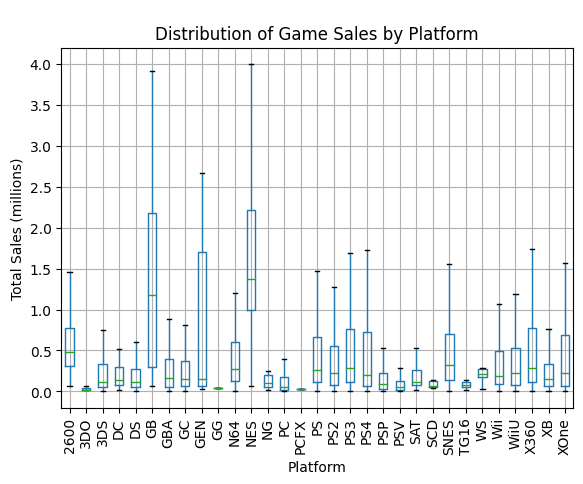

In [26]:
# Create box plot of sales by platform
plt.figure(figsize=(14,6))
games.boxplot(column='total_sales', by='platform', showfliers=False)

plt.title('Distribution of Game Sales by Platform')
plt.suptitle(' ')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Calculate detailed statistics for each platform
games.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [28]:
# Choose a popular platform based on your previous analysis
ps4_games = games[games['platform'] == 'PS4']

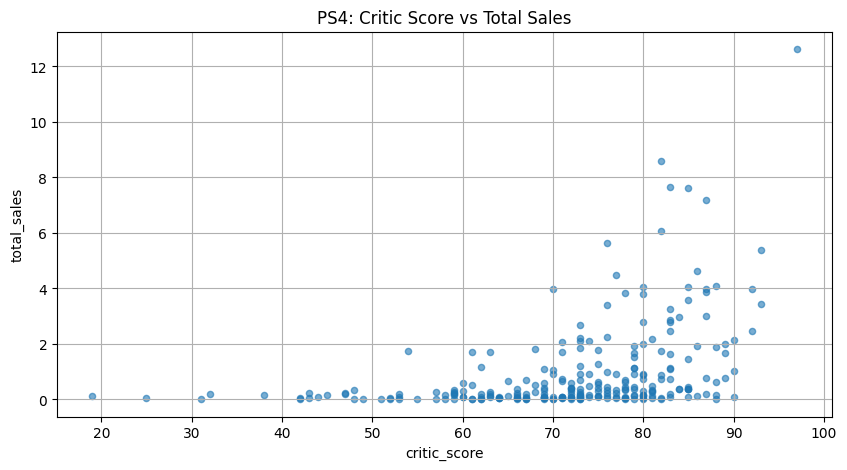

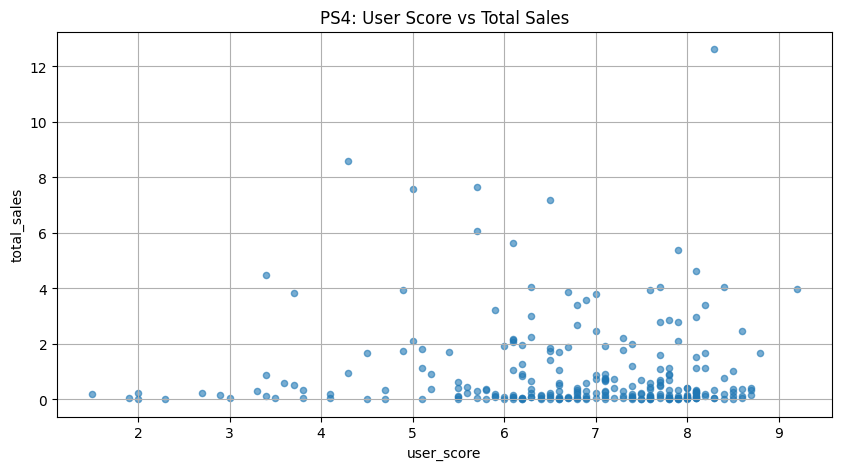

In [29]:
# Create scatter plots for both critic and user scores
ps4_games.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    title='PS4: Critic Score vs Total Sales',
    alpha=0.6,
    grid=True,
    figsize=(10,5)
)
plt.show()

ps4_games.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    title='PS4: User Score vs Total Sales',
    alpha=0.6,
    grid=True,
    figsize=(10,5)
)
plt.show()

In [30]:
# Critic Scores
print('Correlation between Critic Score and Sales (PS4):', ps4_games['critic_score'].corr(ps4_games['total_sales']))


# User Scores
print('Correlation between User Score and Sales (PS4):', ps4_games['user_score'].corr(ps4_games['total_sales']))

# Calculate correlations


Correlation between Critic Score and Sales (PS4): 0.40656790206178095
Correlation between User Score and Sales (PS4): -0.031957110204556376


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [31]:
# Find games released on multiple platforms
multi_platform_games = games.groupby('name')['platform'].nunique()

multi_platform_titles = multi_platform_games[multi_platform_games > 1].index

multi_platform_df = games[games['name'].isin(multi_platform_titles)]
# print(multi_platform_df.head(20))

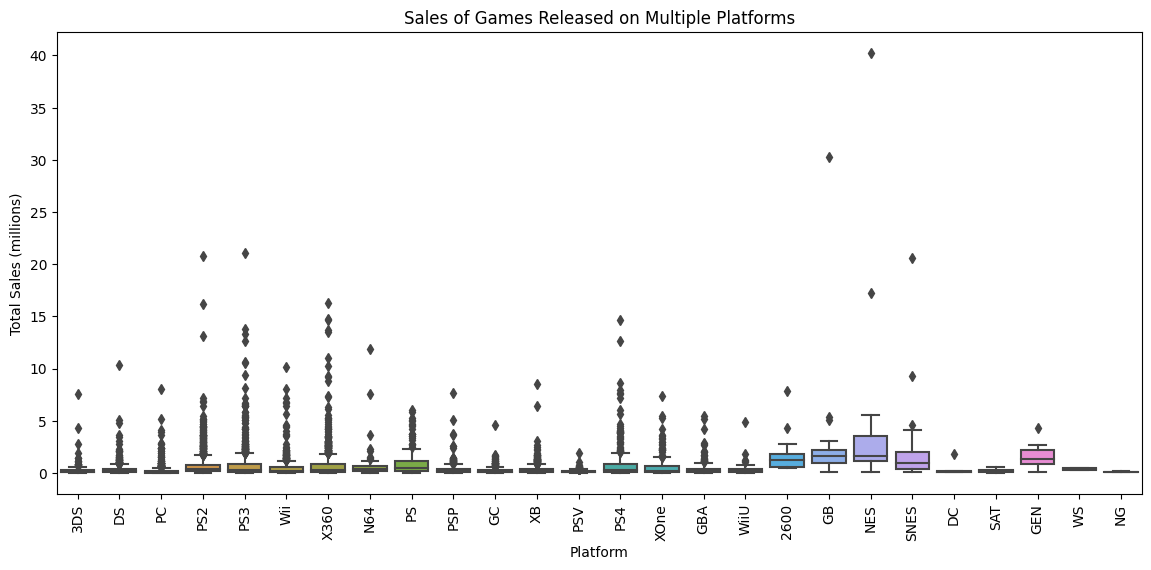

In [32]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
platform_sales_comp = (multi_platform_df.groupby(['name', 'platform'])['total_sales'].sum().reset_index())

plt.figure(figsize=(14,6))
sns.boxplot(data=platform_sales_comp, x='platform', y='total_sales')
plt.xticks(rotation=90)
plt.title('Sales of Games Released on Multiple Platforms')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Platform')
plt.show()

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

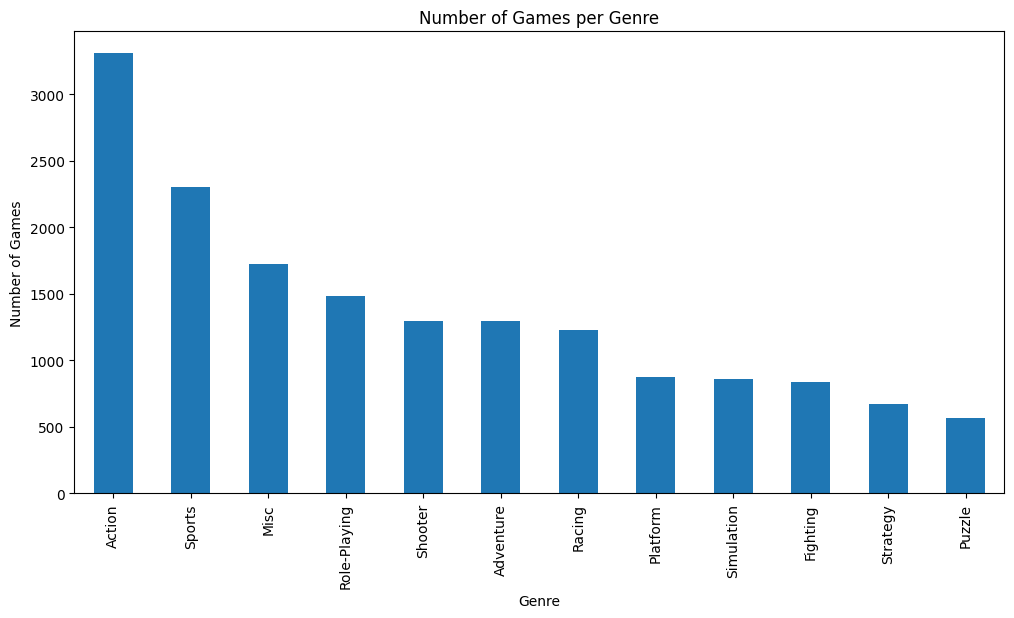

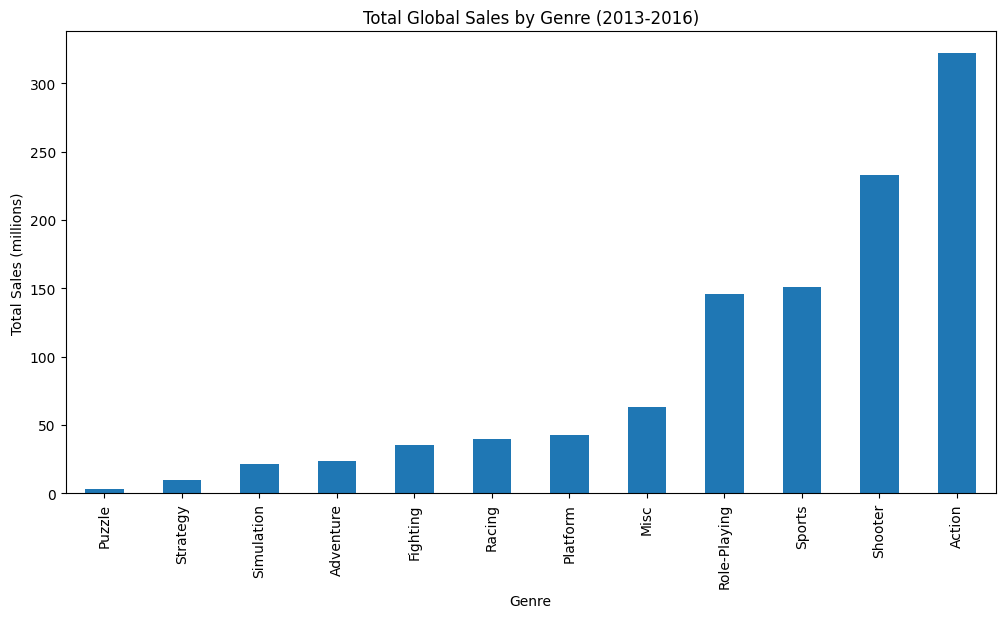

genre            Action  Adventure  Fighting   Misc  Platform  Puzzle  Racing  \
year_of_release                                                                 
2013               0.00       0.00      0.00   0.00      0.00    0.00    0.00   
2014             -20.64      -8.54    123.55  -7.48    -64.10   55.21   34.68   
2015             -25.93      46.50    -50.16 -50.51    -31.33  -52.35  -51.56   
2016             -58.19     -53.19    -43.42 -77.53    -46.61  -98.59  -65.43   

genre            Role-Playing  Shooter  Simulation  Sports  Strategy  
year_of_release                                                       
2013                     0.00     0.00        0.00    0.00      0.00  
2014                     2.63     5.11      -35.34    9.67    -83.99  
2015                   -17.49     3.53        1.43   -9.55     88.78  
2016                   -51.70   -43.39      -66.61  -42.48    -38.92  


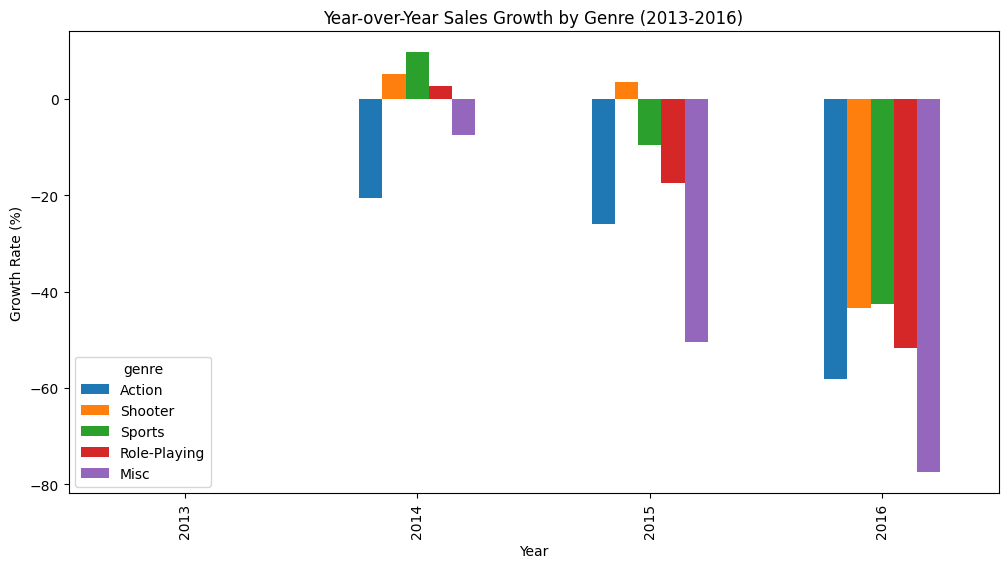

In [47]:
# Analyze genre performance
genre_sales = games_relevant_years.groupby('genre')['total_sales'].sum().sort_values(ascending=True)

games['genre'].value_counts().plot(kind='bar', figsize=(12,6), title='Number of Games per Genre', xlabel='Genre', ylabel='Number of Games', rot=90)
plt.show()

genre_sales.plot(figsize=(12,6), kind = 'bar', title = 'Total Global Sales by Genre (2013-2016)', xlabel = 'Genre', ylabel = 'Total Sales (millions)')
plt.show()

# growth year over year
genre_yearly_sales = games_relevant_years.groupby(['year_of_release', 'genre'])['total_sales'].sum().unstack().fillna(0)
genre_yearly_growth = genre_yearly_sales.pct_change().fillna(0)*100
print(genre_yearly_growth.round(2))

top_genres = genre_yearly_sales.sum().sort_values(ascending=False).head(5).index
genre_yearly_growth[top_genres].plot(kind='bar', figsize=(12,6), title='Year-over-Year Sales Growth by Genre (2013-2016)', xlabel='Year', ylabel='Growth Rate (%)')
plt.show()

In [34]:
# Sort genres by total sales
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales.head(20))

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64


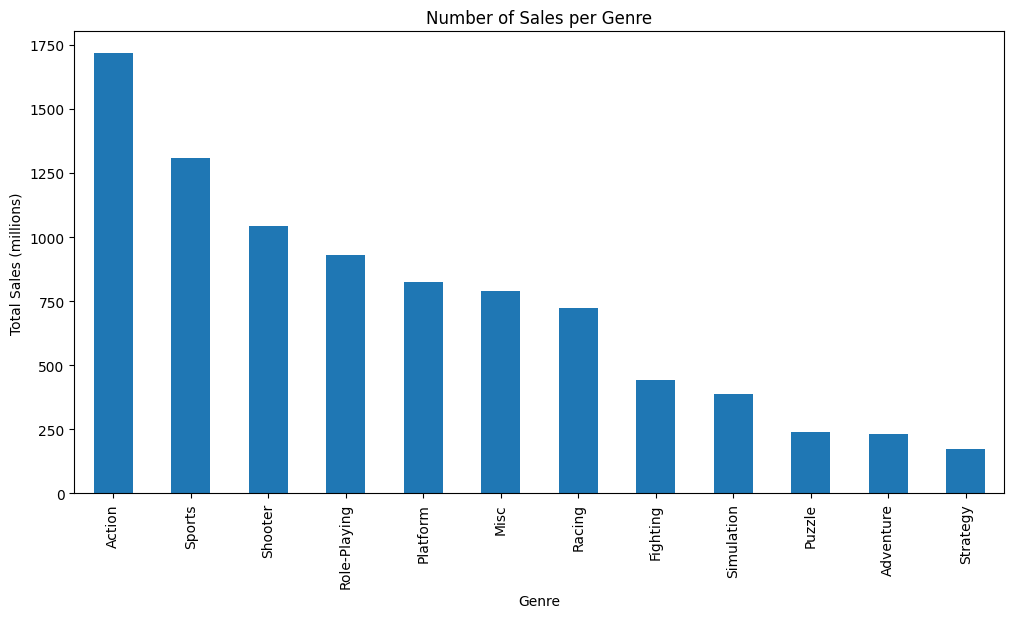

In [35]:
# Visualize genre distribution
genre_sales.plot(kind='bar', figsize=(12,6), title='Number of Sales per Genre', xlabel = 'Genre', ylabel = 'Total Sales (millions)')
plt.show()

In [36]:
# Calculate market share for each genre
total_genre_sales = games.groupby('genre')['total_sales'].sum()

genre_market_share = (total_genre_sales/total_genre_sales.sum())*100

genre_market_share = genre_market_share.sort_values(ascending=False)

print(genre_market_share)

genre
Action          19.474109
Sports          14.858351
Shooter         11.814344
Role-Playing    10.563205
Platform         9.365956
Misc             8.965927
Racing           8.208074
Fighting         5.022027
Simulation       4.401449
Puzzle           2.721579
Adventure        2.647155
Strategy         1.957826
Name: total_sales, dtype: float64


### Key Questions for Genre Analysis:
- Which genres consistently perform well? So looking through the data we can see that Action is the highest number of sales by genre including during our timefrome of 2013-2016. You can see though that compared to the previous years there have been less action games per year compared to previous while other genres are still on the rise.
- Are there any genres showing recent growth or decline? Shooter games show an increase each year save in 2016 which we assume is a partial year or incomplete data set.
- How does the average performance vary across genres? The performance shows that Action has the most amount of games sold and total games but it recently has been more on a decline.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [37]:
# Function to analyze platform performance by region
def analyze_platform_performance(region_column, region_name):
    top_platforms=(games.groupby('platform')[region_column].sum().sort_values(ascending=False))

    top_platforms.plot(kind='bar',title=f'Top Platforms in {region_name}', xlabel = 'Platform', ylabel = 'Sales (millions)', figsize = (12,6))
    plt.show()

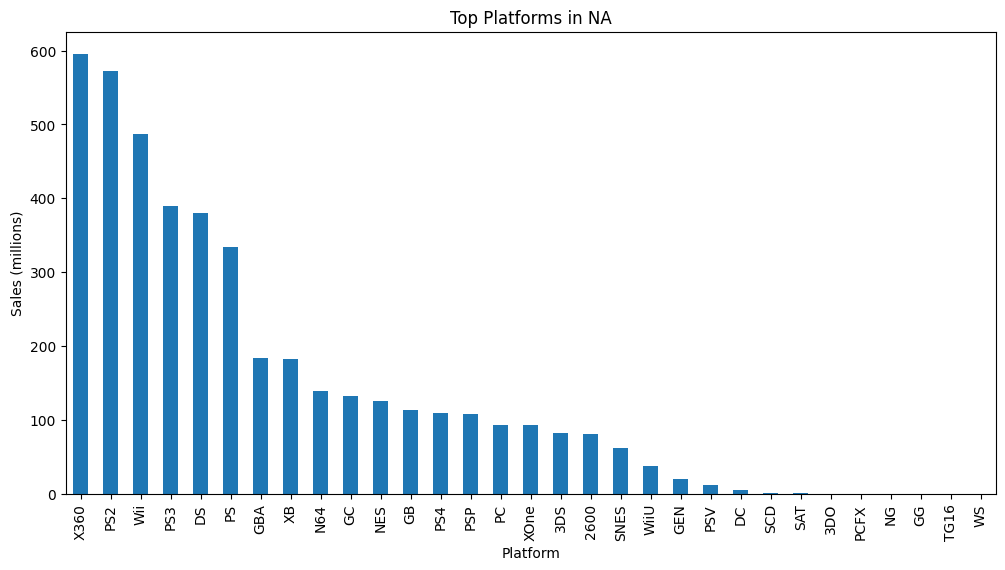

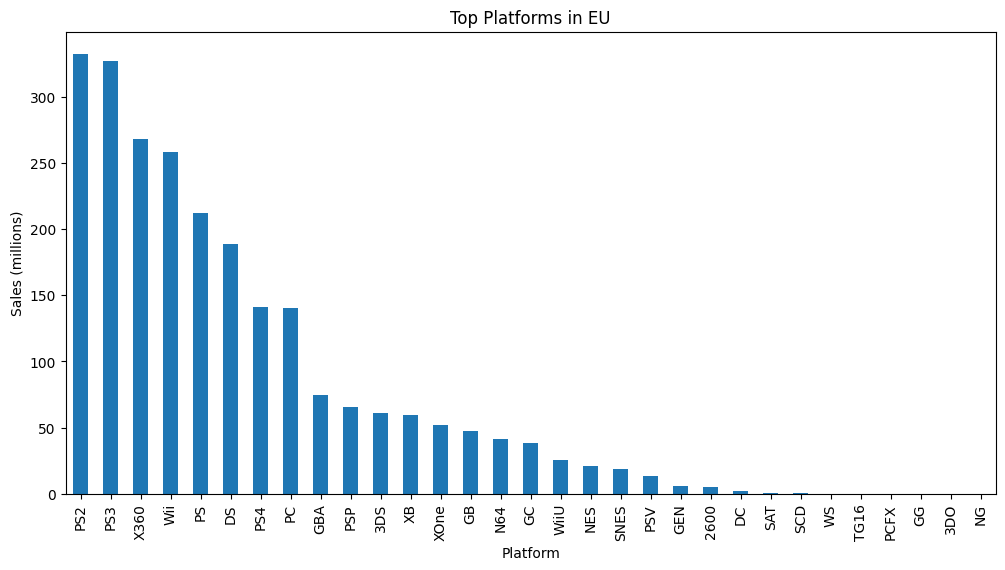

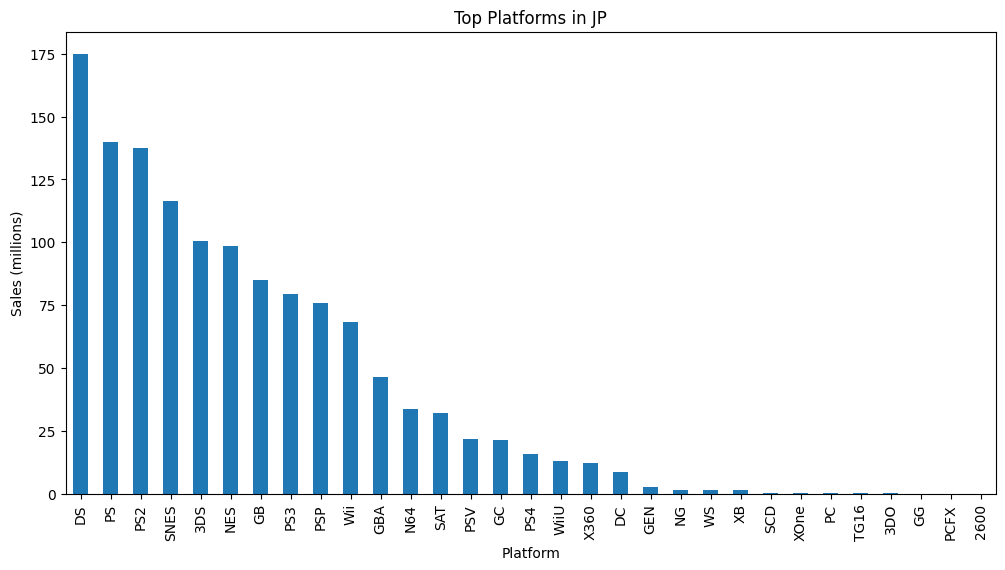

In [38]:
# Analyze each region
analyze_platform_performance('na_sales', 'NA')
analyze_platform_performance('eu_sales', 'EU')
analyze_platform_performance('jp_sales', 'JP')

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

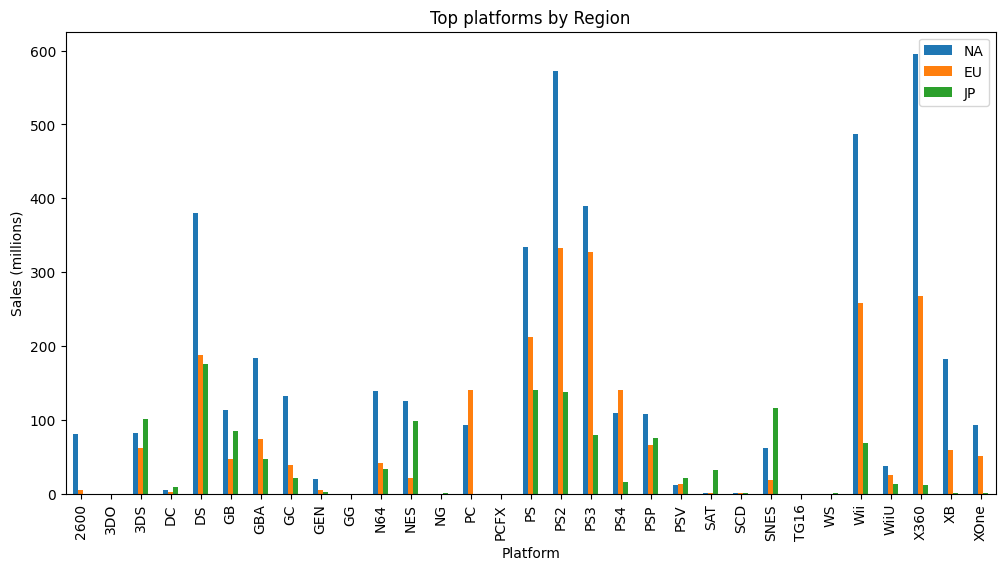

In [39]:
# Create a comparative platform analysis
na_platform = games.groupby('platform')['na_sales'].sum()
eu_platform = games.groupby('platform')['eu_sales'].sum()
jp_platform = games.groupby('platform')['jp_sales'].sum()

platform_comparison = pd.DataFrame({
    'NA' : na_platform,
    'EU' : eu_platform,
    'JP' : jp_platform
})

platform_comparison.plot(kind='bar', figsize=(12,6), title = 'Top platforms by Region', xlabel='Platform', ylabel='Sales (millions)',rot=90)
plt.show()

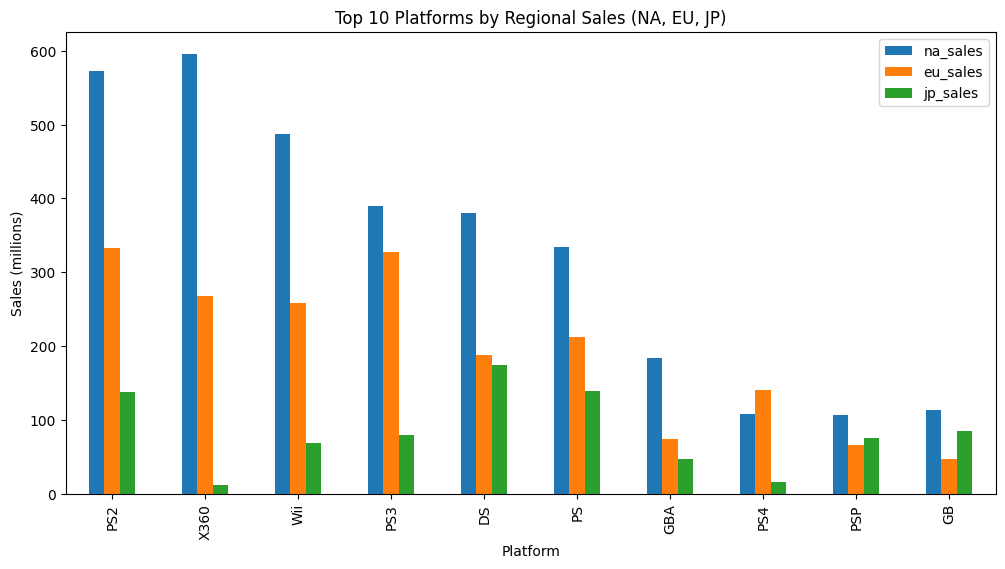

In [40]:
# Visualize cross-regional comparison for top platforms
platform_region_sales = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

platform_region_sales['total'] = platform_region_sales.sum(axis=1)

top_platforms = platform_region_sales.sort_values('total', ascending=False).head(10)

top_platforms = top_platforms.drop(columns='total')

top_platforms.plot(kind='bar', figsize=(12,6), title='Top 10 Platforms by Regional Sales (NA, EU, JP)', xlabel = 'Platform', ylabel = 'Sales (millions)')
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

              na_sales  eu_sales  jp_sales
genre                                     
Action          863.17    510.99    160.14
Sports          671.20    371.33    134.93
Shooter         584.83    314.52     38.68
Platform        444.44    199.39    130.71
Misc            399.57    210.60    107.02
Racing          356.86    234.49     56.63
Role-Playing    330.04    188.24    353.39
Fighting        220.51     99.00     87.28
Simulation      180.40    113.35     63.64
Puzzle          121.13     49.78     56.68
Adventure       101.52     63.20     52.24
Strategy         67.75     44.79     49.30


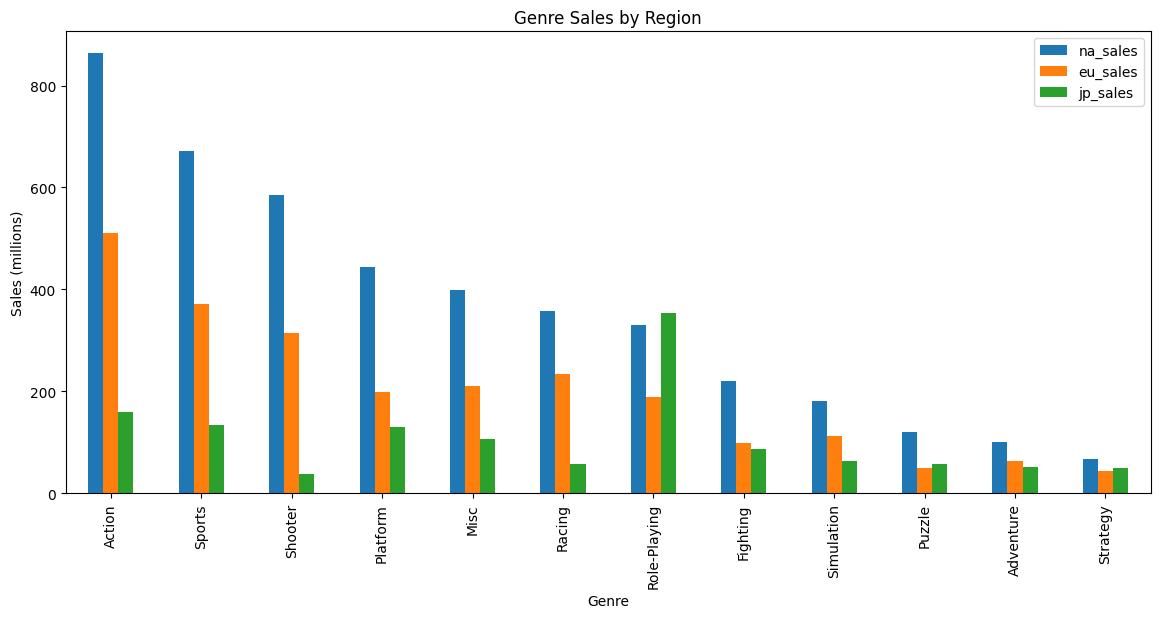

In [41]:
# Function to analyze genre performance by region
def analyze_genre_by_region(df):
    genre_region_sales = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

    genre_region_sales = genre_region_sales.sort_values(by='na_sales', ascending=False)

    return genre_region_sales

genre_region_sales = analyze_genre_by_region(games)
print(genre_region_sales)

genre_region_sales.plot(kind='bar', figsize=(14,6), title='Genre Sales by Region', xlabel = 'Genre', ylabel = 'Sales (millions)', rot=90)
plt.show()

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

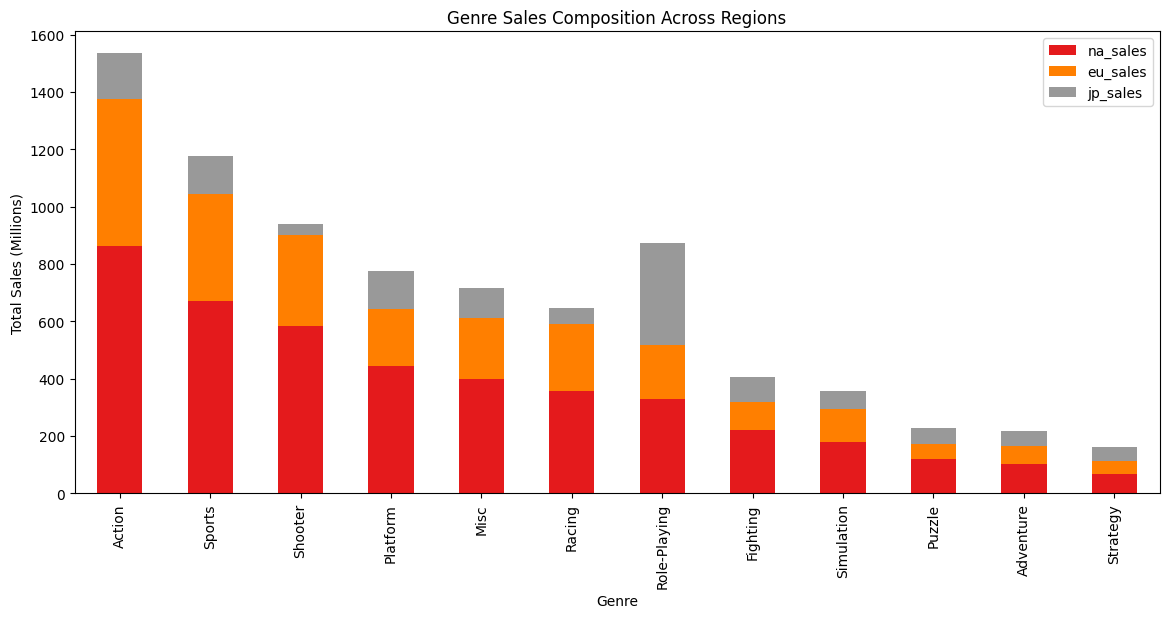

In [42]:
# Create a comparative genre analysis
genre_sum_region_sales = games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

genre_sum_region_sales_sorted = genre_sum_region_sales.sort_values(by='na_sales', ascending=False)

genre_sum_region_sales_sorted.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Set1', title = 'Genre Sales Composition Across Regions', xlabel = 'Genre', ylabel = 'Total Sales (Millions)', rot = 90)
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [43]:
# Function to analyze ESRB rating impact
rating_region_sales = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

rating_region_sales = rating_region_sales.sort_values(by='na_sales', ascending=False)

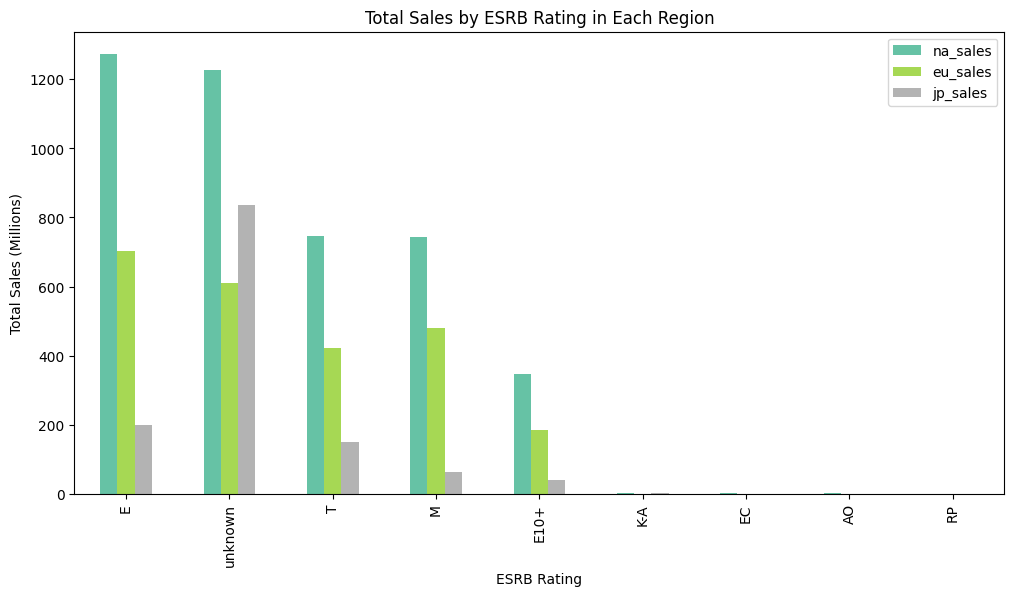

In [44]:
# Analyze ESRB impact for each region
rating_region_sales.plot(kind='bar', figsize=(12,6), colormap='Set2', title = 'Total Sales by ESRB Rating in Each Region', ylabel = 'Total Sales (Millions)', xlabel='ESRB Rating')
plt.show()

### Key Questions for Region Analysis:
- The ESRB sales by region show that NA buy the most of all types of ratings, including the unrated games. Japan had the least purchased games with ESRB ratings. They are a region taht aren't required to submit games to the ESRB so that makes sense.
- NA and EU had majority the same top genres that they buy but JP had a significant difference in their top bought genre is Role-playing.
- For platforms, EU has Sony's Playstation consoles as their top consoles. NA had Xbox 360, Playstation 2 and the Wii so a variety of consoles. JP had the DS as their top console and then into the Playstation and Playstation 2.

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [45]:
# Null Hypothesis: The average user ratings for Xbox One and PC games are equal
# Alternative Hypothesis: The average user ratings for Xbox One and PC games are not equal
# Test to use: Independent samples t-test
# Alpha level: 0.05
xbox_scores = games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score']
pc_scores = games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score']

t_stat, p_value = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

print('T-statistic:', t_stat)
print('P-value:', p_value)
alpha = 0.05

if p_value < alpha:
    print('We reject the null hypothesis: There is a significant difference in user ratings between Xbox One and PC games.')
else:
    print('We fail to reject the null hypothesis: There is no significant difference in user ratings between the Xbox One and PC games.')

action_scores = games[(games['genre']=='Action') & (games['user_score'].notna())]['user_score']
sports_scores = games[(games['genre']=='Sports') & (games['user_score'].notna())]['user_score']

t_stat_genre, p_value_genre = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('T-statistic:', t_stat_genre)
print('P-value:', p_value_genre)

if p_value_genre < alpha:
    print('We reject the null hypothesis: There is a significant difference in user ratings between the Action and Sports genres.')
else:
    print('We fail to reject the null hypothesis: There is no significant difference in the user ratings between the Action and Sports genres.')

T-statistic: -4.671113961085972
P-value: 4.5385802963771835e-06
We reject the null hypothesis: There is a significant difference in user ratings between Xbox One and PC games.
T-statistic: 1.789373351094851
P-value: 0.07370217419278526
We fail to reject the null hypothesis: There is no significant difference in the user ratings between the Action and Sports genres.


# Step 6. Write a general conclusion


This analysis of video game sales from 2013 to 2015 reveals key insights into recent platform trends. We selected 2013–2015 as our analysis window, excluding 2016 due to incomplete data. During this period, PlayStation 4 (PS4) emerged as the leading platform, followed by PlayStation 3 (PS3) and Xbox 360. While older platforms like the Wii and DS showed declining sales, PS4 and Xbox One demonstrated strong growth, suggesting a continuing upward trajectory into 2017.

In terms of genre, Action, Sports, and Shooter games were the most successful globally. These genres consistently led in both game count and total revenue, indicating strong consumer interest and market saturation.

Review scores yielded nuanced results. User scores showed little correlation with sales, while critic scores exhibited a weak but notable positive relationship, implying that professional reviews may have a minor influence on consumer behavior.

Regional analysis highlighted distinct preferences:

North America favored Xbox 360, PS2, and Wii

Europe leaned toward PS2, PS3, and Xbox 360

Japan preferred handhelds like DS, PS, and PS2

Interestingly, ESRB ratings influenced regional markets differently. For example, Japan had a large share of games with no rating or "unknown," possibly due to regional rating systems differing from ESRB.

In our hypothesis testing:

We rejected the null hypothesis that user ratings are the same between Xbox One and PC platforms, confirming a statistically significant difference in user ratings.

We failed to reject the null hypothesis comparing Action and Sports genres, suggesting no significant difference in user ratings between these two popular categories.

Overall, this project provided a comprehensive view of the video game market across platforms, genres, and regions. These insights can inform 2017 sales forecasting and marketing strategies, particularly by focusing efforts on growing platforms (like PS4), strong-performing genres, and adapting campaigns to regional preferences.

